In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os.path
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

This first block of code is used to load the data (in the .dat format) that needs to be analysed.

data_folder_path should be the path to the folder where the data is stored.

data_file_name is the file name.

You can also change the maximum y valued to be shown on the graph by changing the ymax value.

You can change if you want to add or remove the errors on q, but be careful about the command lines that draw the experimental data (make sure it is always either plt.errorbar when error bars are present, or plt.plot when no error bars are present)

(0.001, 0.2223063937538125)

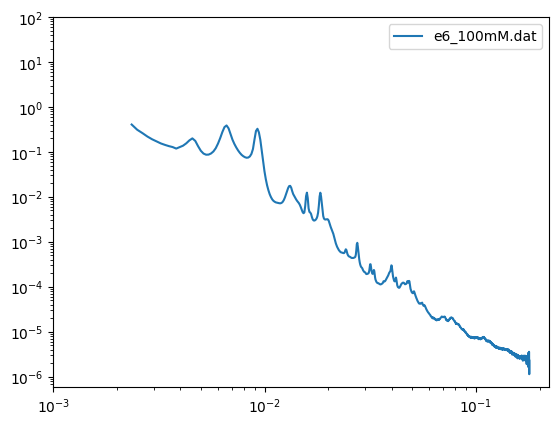

In [39]:
data_folder_path = r"."

data_file_name = ["test_data.dat"]
file_paths = [os.path.join(data_folder_path,data) for data in data_file_name]


ymax = 100

for file_path in file_paths:
    cursor = open(file_path,"r")
    q = []
    Iq = []
    #Errorq = [] #If no Errorq, comment this line
    for ligne in cursor:
        if ligne[0] in ["#", "q"] or "nan" in ligne.split() :
            pass
        else :
            data = ligne.split()
            q.append(float(data[0]))
            Iq.append(float(data[1]))
            #Errorq.append(float(data[2])) #If no Errorq, comment this line
    cursor.close()
#plt.errorbar(x=q,y=Iq,yerr=Errorq,label=data_file_name[0]) #If no Error q, comment this line and uncomment the next one.
plt.plot(q,Iq,label=data_file_name[0]) #Uncomment this line if no Errorq
plt.yscale('log')
plt.legend()
plt.xscale('log')
plt.ylim(bottom=None, top=ymax)
plt.xlim(left=0.001,right=None)

This next block of code generates a hexagonal model on which you can modify the cell parameters. You can also choose to show or hide peaks that satisfy the extinction rule.

Peaks of type hk0 are shown in red, 00l are in green, and mixed hkl are in blue.

In [ ]:
def threeD_generation(hmax,lmax):
    """Generates the list of hkl of a 3D structure where h and l are not equivalent by symmetry up to hmax and lmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(h,hmax+1):
            for l in range(lmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_hexagonal_hkl(a_cell,c_cell,show_extinct = True,xlog=False,cutout=1):
    """Returns and plots the model for the diffraction of a 3D hexagonal crystal of parameters a_cell and c_cell.
    show_extinct : True shows the peaks that satisfy the extinction rule, False does not."""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label=data_file_name[0])
    plt.plot(q,Iq,label=data_file_name[0])
    h_list, k_list, l_list = threeD_generation(3,10)
    S_square = (4/3)*(h_list*h_list+k_list*k_list+h_list*k_list)+((a_cell*a_cell)/(c_cell*c_cell))*l_list*l_list
    qhkl_list = 2*np.pi/a_cell * np.sqrt(S_square)
    i = 0
    while i < len(qhkl_list):
        if qhkl_list[i]<cutout*q[-1] and (show_extinct or not((h_list[i]+2*k_list[i])%3==0 and l_list[i]%2==1)) and (h_list[i]+k_list[i]+l_list[i] <= 10):
            #différencier couleurs hk0, 00l, hkl
            if l_list[i]==0:
                plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
            elif h_list[i]+k_list[i]==0:
                plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
            else :
                plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
        i+=1
    
    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])

interact(threeD_hexagonal_hkl, a_cell=(10,2000), c_cell=(10,5000), show_extinct=True, xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=1005, description='a_cell', max=2000, min=10), IntSlider(value=2505, des…

<function __main__.threeD_hexagonal_hkl(a_cell, c_cell, show_extinct=True, xlog=False, cutout=1)>

In [ ]:
def threeD_generation(hmax,lmax):
    """Generates the list of hkl of a 3D structure where h and l are not equivalent by symmetry up to hmax and lmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(h,hmax+1):
            for l in range(lmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_hexagonal_hkl_randstack(a_cell,c_cell,show_extinct = True,xlog=False,cutout=1):
    """Returns and plots the model for the diffraction of a 3D hexagonal crystal of parameters a_cell and c_cell.
    show_extinct : True shows the peaks that satisfy the extinction rule, False does not."""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label=data_file_name[0])
    plt.plot(q,Iq,label=data_file_name[0])
    h_list, k_list, l_list = threeD_generation(3,5)
    S_square = (4/3)*(h_list*h_list+k_list*k_list+h_list*k_list)+((a_cell*a_cell)/(c_cell*c_cell))*l_list*l_list
    qhkl_list = 2*np.pi/a_cell * np.sqrt(S_square)
    i = 0
    while i < len(qhkl_list):
        if qhkl_list[i]<cutout*q[-1] and (show_extinct or not((h_list[i]+2*k_list[i])%3==0 and l_list[i]%2==1)) and (h_list[i]+k_list[i]+l_list[i] <= 5):
            #différencier couleurs hk0, 00l, hkl
            if l_list[i]==0:
                plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
            elif h_list[i]+k_list[i]==0:
                plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
        i+=1
    
    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])

interact(threeD_hexagonal_hkl_randstack, a_cell=(10,2000), c_cell=(10,5000), show_extinct=True, xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=1005, description='a_cell', max=2000, min=10), IntSlider(value=2505, des…

<function __main__.threeD_hexagonal_hkl_randstack(a_cell, c_cell, show_extinct=True, xlog=False, cutout=1)>

The next block generates a cubic model.

You can select different extinction rule sets for different kinds of lattices (primitive, face centered or body centered).

In [20]:
def threeD_generation_cubic(hmax):
    """Generates the list of hkl for a 3D structure where h and l are equivalent by symmetry up to hmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(h,hmax+1):
            for l in range(k,hmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_cubic_hkl(a_cell,celltype='primitive',xlog=False,cutout=1):
    """Returns and plots the model for the diffraction of a cubic crystal of parameters a_cell"""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label='Raw data')
    plt.plot(q,Iq,label='Raw data')
    h_list, k_list, l_list = threeD_generation_cubic(5)
    S_square = (h_list*h_list+k_list*k_list+l_list*l_list)
    qhkl_list = 2*np.pi/a_cell * np.sqrt(S_square)
    i = 0
    match celltype:
        case 'primitive':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                    plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                i+=1
        case 'body centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]+k_list[i]+l_list[i])%2==0:
                    plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                    plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                i+=1
        case 'face centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and ((h_list[i]%2+k_list[i]%2+l_list[i]%2)==0 or (h_list[i]%2+k_list[i]%2+l_list[i]%2)==3):
                    plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                    plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                i+=1
        case _:
            print("Warning : cell type name undefined. Now showing all possible peaks.")
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                    plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                i+=1
        

    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])


interact(threeD_cubic_hkl, a_cell=(400,2000),celltype=['primitive','face centered','body centered'],xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=1200, description='a_cell', max=2000, min=400), Dropdown(description='ce…

<function __main__.threeD_cubic_hkl(a_cell, celltype='primitive', xlog=False, cutout=1)>

The next block generates a tetragonal model.

It has the same extinction modes as the cubic face (primitive, face centered and body centered), and shows hk0 peaks in red, 00l peaks in green, and hkl peaks in blue.

In [ ]:
def threeD_generation(hmax,lmax):
    """Generates the list of hkl of a 3D structure where h and l are not equivalent by symmetry up to hmax and lmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(h,hmax+1):
            for l in range(lmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_tetragonal_hkl(a_cell,c_cell,celltype,xlog=False,cutout=1):
    """Returns and plots the model for the diffraction of a 3D hexagonal crystal of parameters a_cell and c_cell.
    show_extinct : True shows the peaks that satisfy the extinction rule, False does not."""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label='Raw data')
    plt.plot(q,Iq,label='Raw data')
    h_list, k_list, l_list = threeD_generation(5,5)
    S_square = (h_list*h_list+k_list*k_list+(a_cell*a_cell/(c_cell*c_cell))*l_list*l_list)
    qhkl_list = 2*np.pi/a_cell * np.sqrt(S_square)
    i = 0
    match celltype:
        case 'primitive':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if l_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+k_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                i+=1
        case 'body centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]+k_list[i]+l_list[i])%2==0:
                    if l_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+k_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                i+=1
        case 'face centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and ((h_list[i]%2+k_list[i]%2+l_list[i]%2)==0 or (h_list[i]%2+k_list[i]%2+l_list[i]%2)==3):
                    if l_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+k_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                i+=1
        case 'end centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]%2+k_list[i]%2)==0:
                    if l_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+k_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                i+=1
        case _:
            print("Warning : cell type name undefined. Now showing all possible peaks.")
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if l_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+k_list[i]==0:
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                i+=1
    
    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])

interact(threeD_tetragonal_hkl, a_cell=(10,4000),c_cell=(10,4000),celltype=['primitive','face centered','end centered','body centered'],xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=2005, description='a_cell', max=4000, min=10), IntSlider(value=2005, des…

<function __main__.threeD_tetragonal_hkl(a_cell, c_cell, celltype, xlog=False, cutout=1)>

The next block generates an orthorhombic model.

It has the same extiction modes as the cubic model (primitive, face centered, body centered), and shows h00 peaks in red, 0k0 in blue,  00l in green, and hkl mixed in black.

In [22]:
def threeD_full_generation(hmax,kmax,lmax):
    """Generates the list of hkl of a 3D structure where h and l are not equivalent by symmetry up to hmax and lmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(kmax+1):
            for l in range(lmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_orthorhombic_hkl(a_cell,b_cell,c_cell,celltype,xlog=False,cutout=1):
    """Returns and plots the model for the diffraction of a 3D hexagonal crystal of parameters a_cell and c_cell.
    show_extinct : True shows the peaks that satisfy the extinction rule, False does not."""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label='Raw data')
    plt.plot(q,Iq,label='Raw data')
    h_list, k_list, l_list = threeD_full_generation(3,3,3)
    S_square = (h_list*h_list/(a_cell*a_cell)+k_list*k_list/(b_cell*b_cell)+l_list*l_list/(c_cell*c_cell))
    qhkl_list = 2*np.pi * np.sqrt(S_square)
    i = 0
    match celltype:
        case 'primitive':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'body centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]+k_list[i]+l_list[i])%2==0:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'face centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and ((h_list[i]%2+k_list[i]%2+l_list[i]%2)==0 or (h_list[i]%2+k_list[i]%2+l_list[i]%2)==3):
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'end centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]%2+k_list[i]%2)==0:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #0k0 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case _:
            print("Warning : cell type name undefined. Now showing all possible peaks.")
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #0k0 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
    
    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])

interact(threeD_orthorhombic_hkl, a_cell=(10,4000),b_cell=(10,4000),c_cell=(10,4000),celltype=['primitive','face centered','end centered','body centered'],xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=2005, description='a_cell', max=4000, min=10), IntSlider(value=2005, des…

<function __main__.threeD_orthorhombic_hkl(a_cell, b_cell, c_cell, celltype, xlog=False, cutout=1)>

The next block generates the diffraction pattern of an ice-ray: an orthorhombic cell with a specific ratio between the a and b cell parameters.

In [23]:
def ice_ray(a_cell,c_cell,xlog=False,cutout=1):
    b_cell = 3*a_cell*np.sin(2*np.pi/5)/(1+np.cos(np.pi/5))
    threeD_orthorhombic_hkl(a_cell,b_cell,c_cell,celltype="primitive",xlog=xlog,cutout=cutout)

interact(ice_ray,a_cell=(10,1500),c_cell=(10,3000),xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=755, description='a_cell', max=1500, min=10), IntSlider(value=1505, desc…

<function __main__.ice_ray(a_cell, c_cell, xlog=False, cutout=1)>

The following block generates the diffraction pattern of a monoclinic cell, with control over all three parameters a, b, and c, and gamma, the angle between a and b.

In [27]:
def threeD_full_generation(hmax,kmax,lmax):
    """Generates the list of hkl of a 3D structure where h and l are not equivalent by symmetry up to hmax and lmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(kmax+1):
            for l in range(lmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_monoclinic_hkl(a_cell,b_cell,c_cell,gamma,xlog=False,cutout=1,celltype='primitive'):
    """Returns and plots the model for the diffraction of a monoclinic crystal, of parameter a_cell, b_cell, c_cell and gamma."""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label='Raw data')
    plt.plot(q,Iq,label='Raw data')
    gamma = gamma * np.pi/180
    h_list, k_list, l_list = threeD_full_generation(3,3,5)
    S_square = (1/(np.sin(gamma)*np.sin(gamma)))*(h_list*h_list/(a_cell*a_cell)+k_list*k_list/(b_cell*b_cell)+l_list*l_list/(c_cell*c_cell)*np.sin(gamma)*np.sin(gamma)-2*h_list*k_list*np.cos(gamma)/(a_cell*b_cell))
    qhkl_list = 2*np.pi * np.sqrt(S_square)
    i = 0
    match celltype:
        case 'primitive':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    elif l_list[i]==0: #hk0 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='purple',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='purple')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'hk0 and 00l only':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    elif l_list[i]==0: #hk0 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='purple',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='purple')
                i+=1
        case 'body centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]+k_list[i]+l_list[i])%2==0:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'face centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and ((h_list[i]%2+k_list[i]%2+l_list[i]%2)==0 or (h_list[i]%2+k_list[i]%2+l_list[i]%2)==3):
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case _:
            print("Warning : cell type name undefined. Now showing all possible peaks.")
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
    
    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])

interact(threeD_monoclinic_hkl, a_cell=(10,1100), b_cell=(10,4000), c_cell=(10,4000), gamma=(0.1,180,0.1),celltype=['primitive','hk0 and 00l only','face centered','body centered'], xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=555, description='a_cell', max=1100, min=10), IntSlider(value=2005, desc…

<function __main__.threeD_monoclinic_hkl(a_cell, b_cell, c_cell, gamma, xlog=False, cutout=1, celltype='primitive')>

The following block generates the structure peaks for a perfect Dürer packing from a monoclinic crystalline structure, with a 72° angle between a and b, and a specific ratio between a and b.

In [28]:
def perfect_durer(a_cell,c_cell,xlog,cutout,celltype):
    b_cell = a_cell*2*np.sin(np.pi/5)/np.sqrt(2*np.cos(np.pi/5)+2)
    threeD_monoclinic_hkl(a_cell,b_cell,c_cell,72.,xlog=xlog,cutout=cutout,celltype=celltype)

interact(perfect_durer,a_cell=(10,1100),c_cell=(10,4000),xlog=False,cutout=(0.00,1.00,0.01),celltype=['primitive','hk0 and 00l only'])

interactive(children=(IntSlider(value=555, description='a_cell', max=1100, min=10), IntSlider(value=2005, desc…

<function __main__.perfect_durer(a_cell, c_cell, xlog, cutout, celltype)>

The following block generates the structure factor peaks for a triclinc crystalline structure.

In [ ]:
def threeD_full_generation(hmax,kmax,lmax):
    """Generates the list of hkl of a 3D structure where h and l are not equivalent by symmetry up to hmax and lmax"""
    #generation of the coordinates list
    coordinates = []
    for h in range(hmax+1):
        for k in range(kmax+1):
            for l in range(lmax+1):
                coordinates.append([h,k,l])
    coordinates = np.array(coordinates)
    h = coordinates[1:,0]
    k = coordinates[1:,1]
    l = coordinates[1:,2]
    return h, k, l

def threeD_triclinic_hkl(a_cell,b_cell,c_cell,alpha,beta,gamma,xlog=False,cutout=1,celltype='h00, 0k0, 00l'):
    """Returns and plots the model for the diffraction of a triclinic crystal, of parameter a_cell, b_cell, c_cell, alpha, beta, gamma."""
    plt.figure(figsize=(20,6))
    #plt.errorbar(x=q,y=Iq,yerr=Errorq,label='Raw data')
    plt.plot(q,Iq,label='Raw data')
    gamma = gamma * np.pi/180
    alpha = alpha * np.pi/180
    beta = beta * np.pi/180
    ca = np.cos(alpha)
    cb = np.cos(beta)
    cg = np.cos(gamma)
    sa = np.sin(alpha)
    sb = np.sin(beta)
    sg = np.sin(gamma)
    h_list, k_list, l_list = threeD_full_generation(3,3,3)
    S_square = ((h_list*h_list*sa*sa/(a_cell*a_cell))+(k_list*k_list*sb*sb/(b_cell*b_cell))+(l_list*l_list*sg*sg)/(c_cell*c_cell)-(2*k_list*l_list*(ca-cb*cg)/(b_cell*c_cell))-(2*l_list*h_list*(cb-cg*ca)/(c_cell*a_cell))-(2*h_list*k_list*(cg-ca*cb)/(a_cell*b_cell)))/(1-ca*ca-cb*cb-cg*cg+2*ca*cb*cg)
    qhkl_list = 2*np.pi * np.sqrt(S_square)
    i = 0
    match celltype:
        case 'primitive':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    elif l_list[i]==0: #hk0 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='purple',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='purple')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'h00, 0k0, 00l':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #0k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                i+=1
        case 'hk0 and 00l only':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    elif l_list[i]==0: #hk0 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='purple',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='purple')
                i+=1
        case 'body centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and (h_list[i]+k_list[i]+l_list[i])%2==0:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case 'face centered':
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1] and ((h_list[i]%2+k_list[i]%2+l_list[i]%2)==0 or (h_list[i]%2+k_list[i]%2+l_list[i]%2)==3):
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
        case _:
            print("Warning : cell type name undefined. Now showing all possible peaks.")
            while i < len(qhkl_list):
                if qhkl_list[i]<cutout*q[-1]:
                    if k_list[i]+l_list[i]==0: #h00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='r',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='r')
                    elif h_list[i]+l_list[i]==0: #k00 peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='b',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='b')
                    elif h_list[i]+k_list[i]==0: #00l peak
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='g',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='g')
                    else :
                        plt.axvline(qhkl_list[i],ymin=0,ymax=100,color='black',linestyle='--')
                        plt.text(qhkl_list[i],ymax*0.2,str(h_list[i])+str(k_list[i])+str(l_list[i]),color='black')
                i+=1
    
    plt.yscale('log')
    plt.legend()
    if xlog:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.ylim(bottom=None, top=ymax)
    plt.xlim(left=0.001,right=cutout*q[-1])

interact(threeD_triclinic_hkl, a_cell=(10,1100), b_cell=(10,4000), c_cell=(10,4000), alpha=(0.1,180,0.1), beta=(0.1,180,0.1),gamma=(0.1,180,0.1),celltype=['primitive','h00, 0k0, 00l','hk0 and 00l only','face centered','body centered'], xlog=False, cutout=(0.00,1.00,0.01))

interactive(children=(IntSlider(value=555, description='a_cell', max=1100, min=10), IntSlider(value=2005, desc…

<function __main__.threeD_triclinic_hkl(a_cell, b_cell, c_cell, alpha, beta, gamma, xlog=False, cutout=1, celltype='h00, 0k0, 00l')>